**Problem Statement**

This is a problem to identify wheather a given news is fake or real.
The Indepedent variables or factors used here can be title of news or news lines themselves.
We will be looking at different model to solve this problem.
In this notebook we will using RNN Bidirectional LSTM deep learning model.

**Dataset**

The dataset for news is taken from Kaggle https://www.kaggle.com/c/fake-news/.
The dataset is quite huge containing thousands of rows, we expect our model to be highly accurate.

# Step 1 - Importing the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 2 - Importing the dataset

In [3]:
data = pd.read_csv('/content/drive/My Drive/Data Science Projects/Dataset Fakenews.csv') # 1 is for fake 0 for real
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Step 3 - Dealing with null values

In [4]:
print(data.isnull().sum())
data.dropna(inplace = True)
data.reset_index(inplace = True)

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [5]:
print(data.isnull().sum())

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64


# Step 4 - Making independent variable X and dependent variable Y

In [6]:
X = data.iloc[:, 2] # Taking title as input
Y = data.iloc[:, -1]

In [7]:
X.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [8]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

# Step 5 - Splitting dataset into Training and Test

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Step 6 - Tokenizing the data

In [10]:
MAX_VOCAB_SIZE = 5000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

wordsindices = (tokenizer.word_index)

uniquetokens = len(wordsindices)

In [11]:
print(uniquetokens)

22880


# Step 7 - Padding Sequences

In [14]:
X_train = pad_sequences(X_train) # Padding sequences to make tham of equal length

T = X_train.shape[1]

X_test = pad_sequences(X_test, maxlen = T) #Paddking according to size of X_train to make it equal


# Step 8 - Creating Deep Learning RNN Bidirectional LSTM model

In [17]:
D = 20 # We can choose dimensionality manually

i = Input(shape = (T,))
x = Embedding(uniquetokens+1, D)(i) #here we have added 1 to uniquetokens because index 0 was reserved for padding thus unique tokens are always 1 more that what is return by tokenizer.word_index
x = Bidirectional(LSTM(15, return_sequences = True))(x) # Using Bidirectional LSTM
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

his = model.fit(X_train, Y_train , validation_data = (X_test, Y_test), epochs = 10, batch_size = 32)


Epoch 1/10
458/458 [==============================] - 6s 14ms/step - loss: 0.3243 - accuracy: 0.8417 - val_loss: 0.1855 - val_accuracy: 0.9303
Epoch 2/10
458/458 [==============================] - 6s 13ms/step - loss: 0.1346 - accuracy: 0.9526 - val_loss: 0.1811 - val_accuracy: 0.9338
Epoch 3/10
458/458 [==============================] - 6s 13ms/step - loss: 0.0909 - accuracy: 0.9707 - val_loss: 0.1821 - val_accuracy: 0.9336
Epoch 4/10
458/458 [==============================] - 6s 13ms/step - loss: 0.0607 - accuracy: 0.9834 - val_loss: 0.1923 - val_accuracy: 0.9360
Epoch 5/10
458/458 [==============================] - 6s 13ms/step - loss: 0.0421 - accuracy: 0.9897 - val_loss: 0.2109 - val_accuracy: 0.9273
Epoch 6/10
458/458 [==============================] - 6s 13ms/step - loss: 0.0329 - accuracy: 0.9923 - val_loss: 0.2209 - val_accuracy: 0.9344
Epoch 7/10
458/458 [==============================] - 6s 13ms/step - loss: 0.0245 - accuracy: 0.9938 - val_loss: 0.2621 - val_accuracy: 0.9240

# Step 10 - Plotting Loss and Accuracy

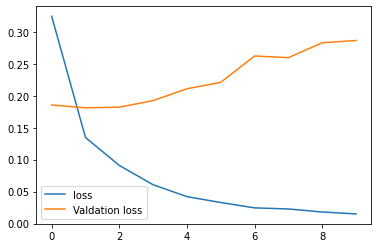

In [18]:
#Plotting Loss

plt.plot(his.history['loss'], label = 'loss')
plt.plot(his.history['val_loss'], label = 'Valdation loss')
plt.legend()


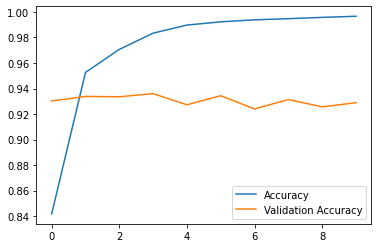

In [19]:
plt.plot(his.history['accuracy'], label='Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Step 9 - Predicting results and checking accuracy

In [20]:
yhat = model.predict(X_test)
yhat = yhat>=0.5

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, yhat)
accuracy = accuracy_score(Y_test, yhat)

print(accuracy)
print(cm)

0.9289034727919059
[[1903  137]
 [ 123 1494]]


# Step 10 - Saving model for future use and deplyoment

In [21]:
import pickle 

model.save('Model.h5')

with open("T.pkl" , "wb") as filename:
  pickle.dump(T, filename)

with open("tokenizer.pkl" , "wb") as filename:
  pickle.dump(tokenizer, filename)

**Conclusion**

We can see that Deep Learning model RNN Bidirectional LSTM gave a greater accuracy  then normal Bag of Words Models and normal LSTM model, thus this should be preferred over Bag of Words models in most NLP related problems incuding this one.

The Validation Accuracy we got for LSTM was 92%.
The Validation Accuracy we got for Bidirectional LSTM is 0.9289034727919059

